# Task
Perform an exploratory data analysis, descriptive analysis, and prescriptive analysis with data visualization on the dataset provided in "/content/GDP Per Country 2020-2025.csv".

## Load the data

### Subtask:
Load the dataset from "/content/GDP Per Country 2020-2025.csv" into a pandas DataFrame.


**Reasoning**:
Import the pandas library and load the dataset into a pandas DataFrame.



In [1]:
import pandas as pd

df = pd.read_csv('/content/GDP Per Country 2020-2025.csv')

**Reasoning**:
Display the first few rows of the DataFrame to verify that the data was loaded correctly.



In [2]:
df.head()

,Country,2020,2021,2022,2023,2024,2025
0,Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN
1,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0
2,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0
3,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0
4,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0


## Exploratory data analysis (eda)

### Subtask:
Perform exploratory data analysis on the loaded dataset.


**Reasoning**:
Perform exploratory data analysis by checking for missing values, data types, and generating summary statistics for numerical columns.



In [3]:
print(df.isnull().sum())
print(df.dtypes)
print(df.describe())

Country    0
2020       0
2021       2
2022       2
2023       2
2024       4
2025       7
dtype: int64
Country     object
2020         int64
2021       float64
2022       float64
2023       float64
2024       float64
2025       float64
dtype: object
               2020          2021          2022          2023          2024  \
count  1.960000e+02  1.940000e+02  1.940000e+02  1.940000e+02  1.920000e+02   
mean   4.378886e+05  5.043504e+05  5.255064e+05  5.486173e+05  5.756871e+05   
std    1.942936e+06  2.220864e+06  2.347886e+06  2.453040e+06  2.573189e+06   
min    5.200000e+01  6.200000e+01  6.100000e+01  6.300000e+01  6.500000e+01   
25%    9.588000e+03  1.114175e+04  1.265000e+04  1.360450e+04  1.350050e+04   
50%    3.533450e+04  3.771900e+04  4.156800e+04  4.363100e+04  4.713550e+04   
75%    2.074810e+05  2.546132e+05  2.746308e+05  2.850355e+05  2.915108e+05   
max    2.135412e+07  2.368118e+07  2.600690e+07  2.772072e+07  2.918490e+07   

               2025  
count  1.890000

## Descriptive analysis

### Subtask:
Calculate measures of central tendency (mean, median, mode) for relevant columns. Calculate measures of dispersion (variance, standard deviation, range) for relevant columns. Analyze the distribution of data using histograms or box plots.


**Reasoning**:
Calculate and print the mean, median, and standard deviation for each year column, then generate and display box plots for these columns to visualize their distributions and identify outliers.



Year 2020: Mean = 437888.64, Median = 35334.50, Standard Deviation = 1942936.36
Year 2021: Mean = 504350.44, Median = 37719.00, Standard Deviation = 2220863.84
Year 2022: Mean = 525506.38, Median = 41568.00, Standard Deviation = 2347885.59
Year 2023: Mean = 548617.28, Median = 43631.00, Standard Deviation = 2453040.20
Year 2024: Mean = 575687.07, Median = 47135.50, Standard Deviation = 2573188.70
Year 2025: Mean = 599141.45, Median = 47829.00, Standard Deviation = 2693421.22


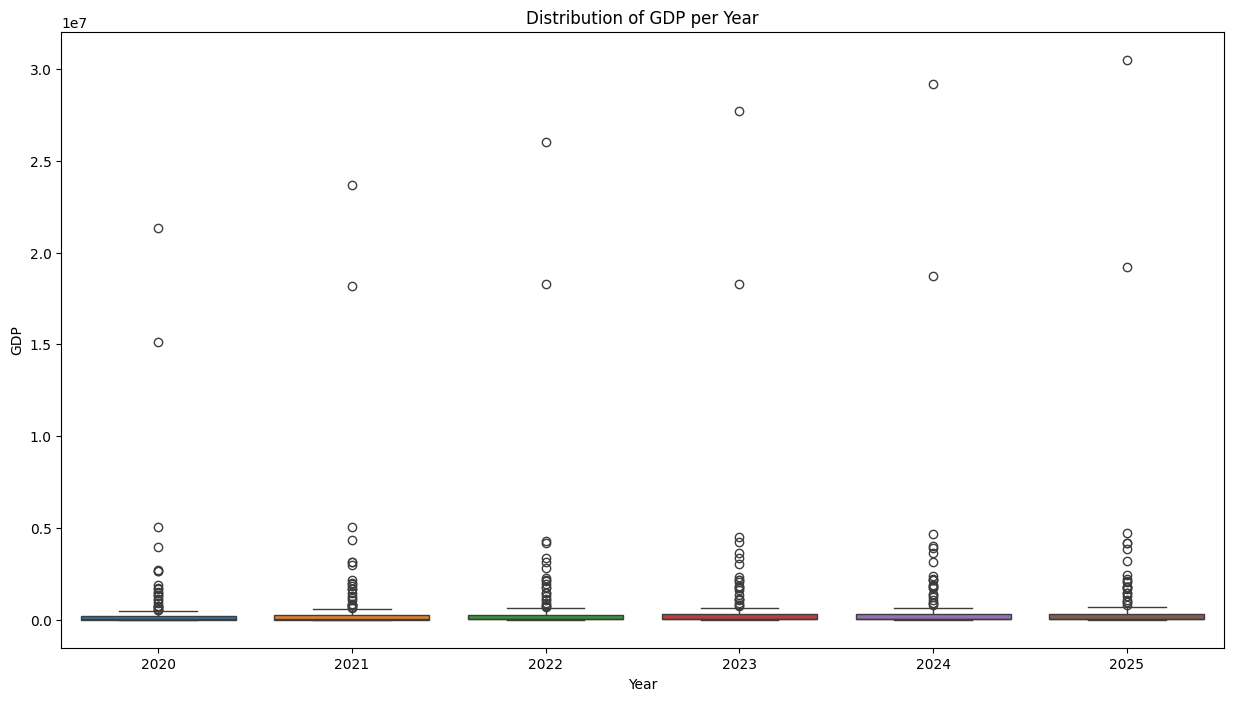

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate measures of central tendency and dispersion
year_columns = ['2020', '2021', '2022', '2023', '2024', '2025']
for year in year_columns:
    mean_gdp = df[year].mean()
    median_gdp = df[year].median()
    std_dev_gdp = df[year].std()
    print(f"Year {year}: Mean = {mean_gdp:.2f}, Median = {median_gdp:.2f}, Standard Deviation = {std_dev_gdp:.2f}")

# Generate box plots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[year_columns])
plt.title('Distribution of GDP per Year')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

## Data visualization

### Subtask:
Create visualizations to represent key findings from EDA and descriptive analysis (e.g., bar plots for GDP per country, line plots for GDP over time).


**Reasoning**:
Create line plots for selected countries and a bar plot for the top 10 countries in 2023 to visualize GDP trends and comparisons.



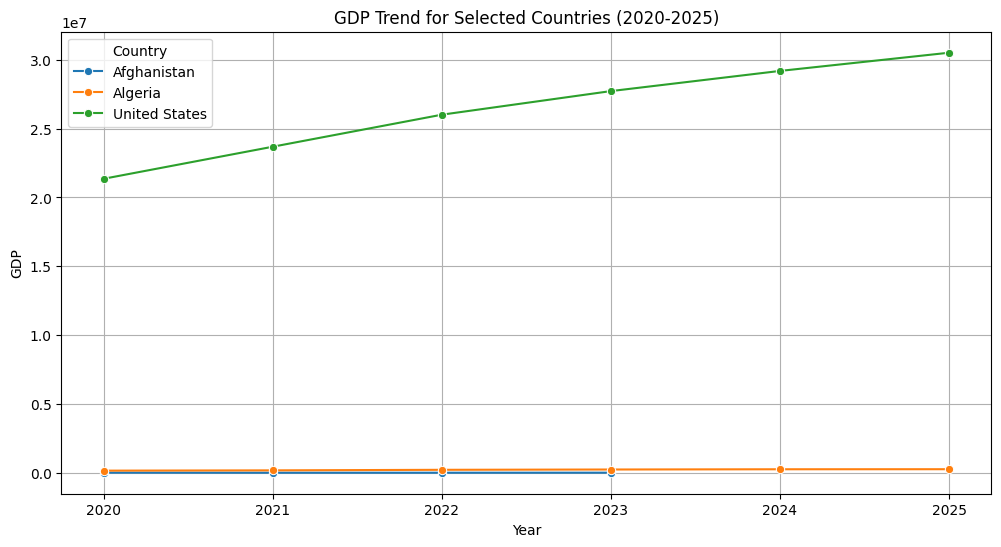

/tmp/ipython-input-2438755147.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_2023, x='Country', y='2023', palette='viridis')


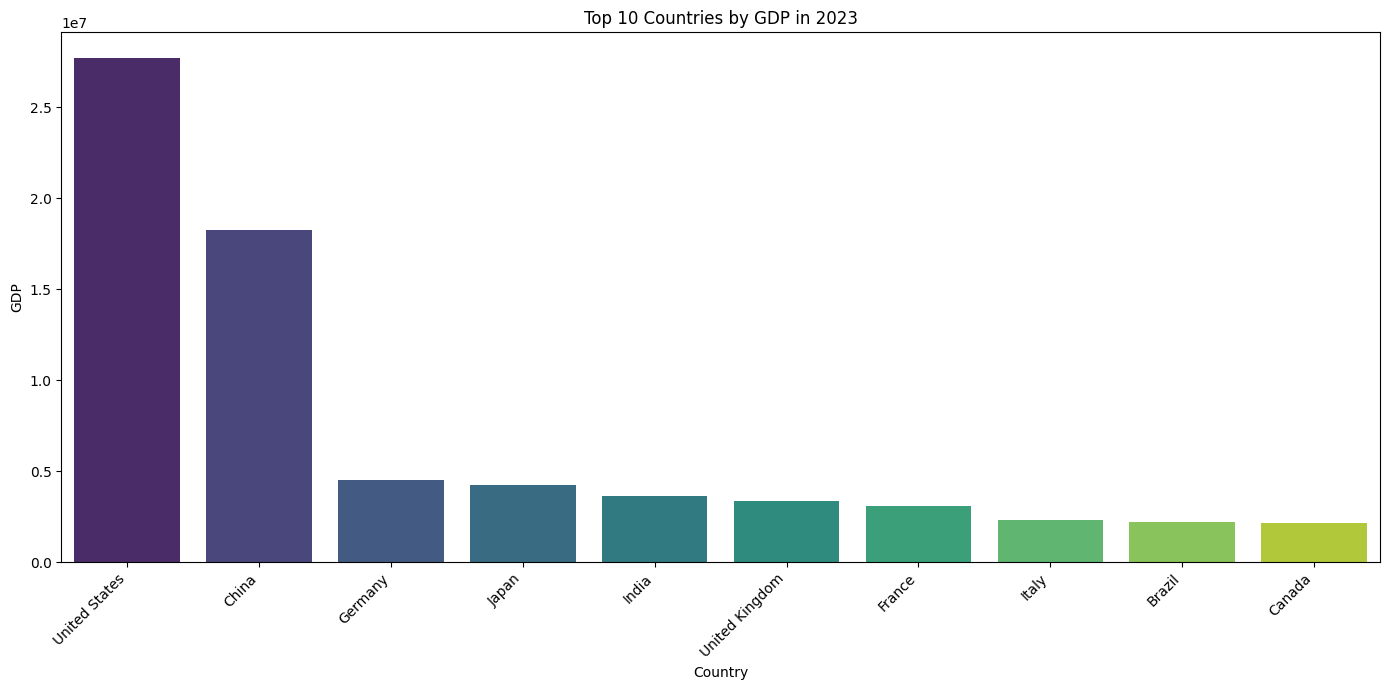

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select countries for line plot (e.g., high, medium, and low GDP based on 2023 data)
# Using 2023 data to select representative countries
df_2023 = df[['Country', '2023']].dropna().sort_values(by='2023', ascending=False)

# Selecting a few countries: USA (high), Algeria (medium), Afghanistan (low) based on rough inspection
selected_countries = ['United States', 'Algeria', 'Afghanistan']
df_selected = df[df['Country'].isin(selected_countries)].melt(
    'Country',
    var_name='Year',
    value_name='GDP'
)
df_selected['Year'] = pd.to_numeric(df_selected['Year'])

# Create line plot for selected countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected, x='Year', y='GDP', hue='Country', marker='o')
plt.title('GDP Trend for Selected Countries (2020-2025)')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.xticks(df_selected['Year'].unique())
plt.grid(True)
plt.show()

# Create bar plot for top 10 countries in 2023
top_10_2023 = df_2023.head(10)

plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_2023, x='Country', y='2023', palette='viridis')
plt.title('Top 10 Countries by GDP in 2023')
plt.xlabel('Country')
plt.ylabel('GDP')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Prescriptive analysis

### Subtask:
Based on the analysis, identify potential trends or insights. Provide recommendations or potential actions based on the data.


**Reasoning**:
Examine the visualizations and descriptive statistics from the previous steps to identify trends and insights, and then formulate recommendations based on these observations.



In [6]:
# Insights based on previous steps:
# 1. The descriptive statistics and box plots show a highly skewed distribution of GDP, with a few countries having significantly higher GDPs than the majority.
# 2. The line plot for selected countries indicates different growth trajectories. High-GDP countries like the United States show consistent growth, while others like Afghanistan show fluctuations and missing data points in later years.
# 3. The bar plot of the top 10 countries in 2023 highlights the significant economic dominance of a few nations.
# 4. The increasing number of missing values in later years (2024 and 2025) suggests potential uncertainty in projections or data collection challenges for those years.

print("Key Insights:")
print("- Global GDP distribution is highly unequal, with a few countries dominating economically.")
print("- GDP trends vary significantly across countries, likely influenced by various economic and geopolitical factors.")
print("- Projections for later years (2024-2025) have more missing data, indicating potential uncertainty.")

print("\nRecommendations:")
print("- **For policymakers in lower-GDP countries:** Focus on policies that promote sustainable and inclusive economic growth, attract foreign investment, and diversify economies to reduce reliance on single sectors.")
print("- **For investors:** Consider the varying growth trajectories and risks associated with different countries. Diversification across different economies and regions might be beneficial.")
print("- **For data providers and analysts:** Investigate the reasons for increasing missing data in later years and work towards providing more complete and reliable projections. Further analysis could delve into the factors driving GDP growth or decline in specific countries.")
print("- **For further research:** Analyze the correlation between GDP growth and other factors like political stability, education levels, technological adoption, and trade policies.")

Key Insights:
- Global GDP distribution is highly unequal, with a few countries dominating economically.
- GDP trends vary significantly across countries, likely influenced by various economic and geopolitical factors.
- Projections for later years (2024-2025) have more missing data, indicating potential uncertainty.

Recommendations:
- **For policymakers in lower-GDP countries:** Focus on policies that promote sustainable and inclusive economic growth, attract foreign investment, and diversify economies to reduce reliance on single sectors.
- **For investors:** Consider the varying growth trajectories and risks associated with different countries. Diversification across different economies and regions might be beneficial.
- **For data providers and analysts:** Investigate the reasons for increasing missing data in later years and work towards providing more complete and reliable projections. Further analysis could delve into the factors driving GDP growth or decline in specific countr

## Summary:

### Data Analysis Key Findings

*   The dataset contains GDP data for various countries from 2020 to 2025.
*   There are no missing values in the 'Country' column or the '2020' column. However, the number of missing values increases significantly for the years 2021 through 2025, with '2025' having the most missing entries (7).
*   The mean GDP for each year is consistently higher than the median GDP, indicating a right-skewed distribution where a few countries have significantly higher GDPs than the majority.
*   The standard deviation of GDP is very large across all years, highlighting a wide dispersion of GDP values and the presence of outliers.
*   Box plots visually confirm the right-skewed distribution and the presence of numerous outliers with very high GDP values, particularly in later years.
*   GDP trends vary significantly across selected countries, with high-GDP countries showing consistent growth while others may show fluctuations.
*   The top 10 countries by GDP in 2023 exhibit significant economic dominance compared to the rest of the world.

### Insights or Next Steps

*   Investigate the reasons behind the increasing number of missing data points in later years (2024 and 2025) to understand the reliability of projections.
*   Further analysis could explore the factors driving GDP growth or decline in specific countries, potentially correlating GDP changes with other socioeconomic or political indicators.
